In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
import joblib
import time

C:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## EDA

In [2]:
df = pd.read_csv('music_genre.csv')

In [3]:
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [5]:
df.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

В датасете присутствуют пустые строки. Удалим их

In [6]:
df[df.isna().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna(ignore_index=True)

In [8]:
df.duplicated().sum()

0

Дубликаты отсутствуют

Удалим столбцы, которые бесполезны для классификатора

In [9]:
df = df.drop(['instance_id', 'artist_name', 'track_name', 'obtained_date'], axis=1)

В столбцах `duration_ms` и `tempo` присутстуют значения -1 и "?" соответственно. Будем считать, что это пропуски. Избавляться от ~19% датасета не представляется разумным, поэтому было принято решение заполнить эти пропуски медианными значениями для каждой группы

In [10]:
df['duration_ms'].value_counts()

duration_ms
-1.0         4939
 240000.0      33
 192000.0      32
 180000.0      28
 216000.0      20
             ... 
 154574.0       1
 359213.0       1
 656213.0       1
 506320.0       1
 189483.0       1
Name: count, Length: 26028, dtype: int64

In [11]:
df['tempo'].value_counts()

tempo
?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
137.046                  1
136.378                  1
93.041                   1
113.98200000000001       1
99.20100000000001        1
Name: count, Length: 29394, dtype: int64

In [12]:
df[(df['duration_ms'] == -1) & (df['tempo'] == '?')].shape[0]

479

In [13]:
df['duration_ms'] = df['duration_ms'].replace(-1, np.nan)
df['tempo'] = pd.to_numeric(df['tempo'].replace('?', np.nan))

df['duration_ms'] = df.groupby('music_genre')['duration_ms'].transform(lambda x: x.fillna(x.median()))
df['tempo'] = df.groupby('music_genre')['tempo'].transform(lambda x: x.fillna(x.median()))

In [14]:
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,245217.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,215240.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.028,0.330,Hip-Hop
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.043,0.113,Hip-Hop
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.886,0.354,Hip-Hop


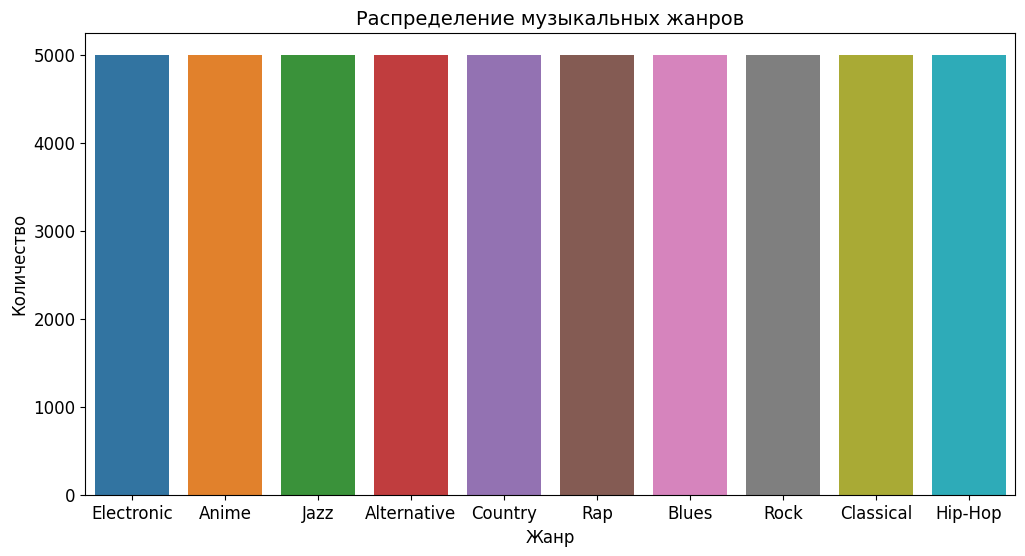

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='music_genre', data=df, order=df['music_genre'].value_counts().index)
plt.title('Распределение музыкальных жанров', fontsize=14)
plt.xlabel('Жанр', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
df['tempo'].describe()

count    50000.000000
mean       119.756366
std         29.226739
min         34.347000
25%         96.551500
50%        120.053000
75%        139.468250
max        220.276000
Name: tempo, dtype: float64

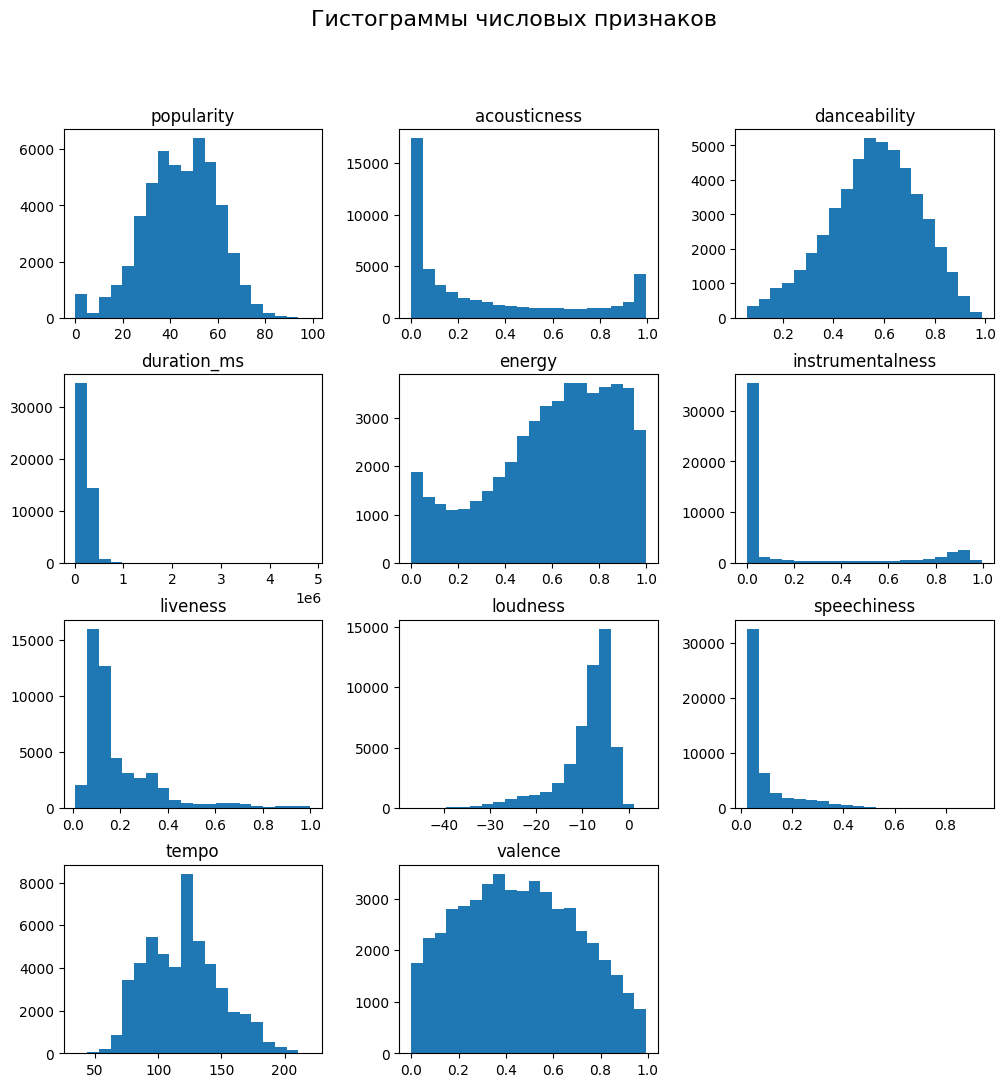

In [18]:
num_cols = df.select_dtypes(include=['float64']).columns
df[num_cols].hist(figsize=(12, 12), bins=20, grid=False)
plt.suptitle('Гистограммы числовых признаков', fontsize=16)
plt.show()

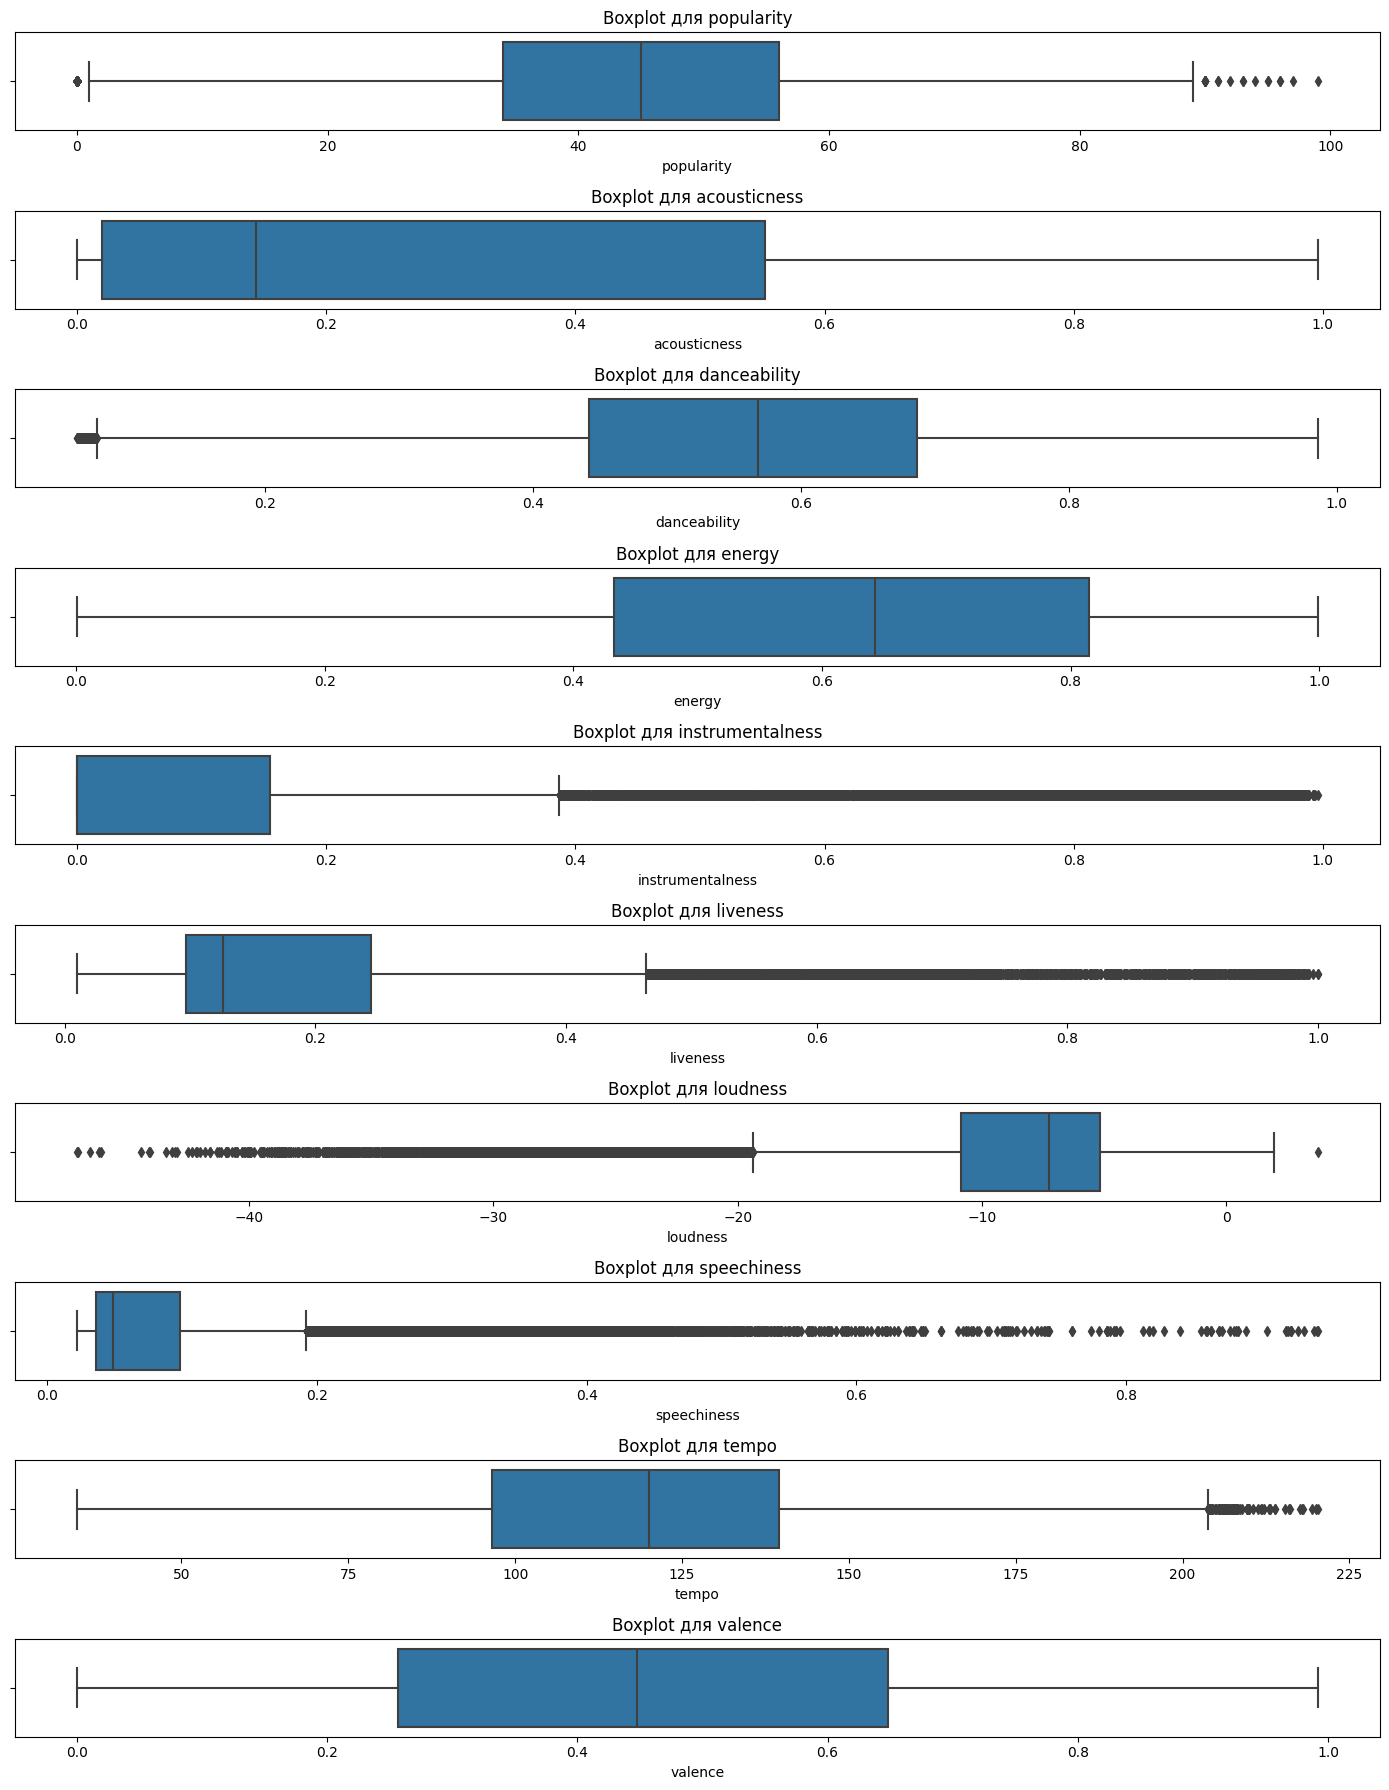

In [24]:
plt.figure(figsize=(14, 18))

for i, column in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot для {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

Закодируем целевой признак с помощью LabelEncoder

In [17]:
label_encoder = LabelEncoder()
df['music_genre'] = label_encoder.fit_transform(df['music_genre'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  object 
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  object 
 10  speechiness       50000 non-null  float64
 11  tempo             50000 non-null  float64
 12  valence           50000 non-null  float64
 13  music_genre       50000 non-null  int32  
dtypes: float64(11), int32(1), object(2)
memory usage: 5.1+ MB


## Baseline модель

In [19]:
categorical = df.select_dtypes(include='object').columns
numeric = df.select_dtypes(np.number).columns.drop(['music_genre'])

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ]
)

In [76]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [77]:
X = df.drop('music_genre', axis=1)
y = df['music_genre']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [79]:
start_time_baseline = time.time()
model.fit(X_train, y_train)
end_time_baseline = time.time()

In [25]:
y_pred = model.predict(X_test)

C:\Anaconda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Anaconda\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [82]:
print(f'Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}')

Classification Report:
              precision    recall  f1-score   support

 Alternative       0.26      0.35      0.30      1500
       Anime       0.61      0.62      0.61      1500
       Blues       0.44      0.41      0.42      1500
   Classical       0.77      0.79      0.78      1500
     Country       0.39      0.52      0.44      1500
  Electronic       0.52      0.45      0.48      1500
     Hip-Hop       0.37      0.42      0.40      1500
        Jazz       0.47      0.36      0.40      1500
         Rap       0.33      0.29      0.31      1500
        Rock       0.44      0.33      0.38      1500

    accuracy                           0.45     15000
   macro avg       0.46      0.45      0.45     15000
weighted avg       0.46      0.45      0.45     15000



In [27]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.45286666666666664


In [75]:
y_pred_proba = model.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

ROC AUC: 0.8197574296296295


### k-NN

In [28]:
results = {}

In [29]:
feature_selection = SelectKBest()

In [30]:
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('classifier', KNeighborsClassifier())
])

In [31]:
param_grid_knn = {
    'feature_selection__k': [5, 10, 15],
    'feature_selection__score_func': [f_classif, mutual_info_classif],
    'classifier__n_neighbors': [3, 5, 10, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2],
}

In [32]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)

C:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [33]:
grid_search_knn = GridSearchCV(
    estimator=model_knn,
    param_grid=param_grid_knn,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=3
)

In [34]:
start_time_knn = time.time()
grid_search_knn.fit(X_train, y_train)
end_time_knn = time.time()

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [35]:
print("Лучшие параметры:", grid_search_knn.best_params_)
print("Лучший ROC AUC на кросс-валидации:", grid_search_knn.best_score_)

Лучшие параметры: {'classifier__n_neighbors': 15, 'classifier__p': 1, 'classifier__weights': 'uniform', 'feature_selection__k': 10, 'feature_selection__score_func': <function f_classif at 0x0000017719CDD480>}
Лучший ROC AUC на кросс-валидации: 0.8967363378684807


In [83]:
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
y_pred_proba_knn = grid_search_knn.best_estimator_.predict_proba(X_test)

print("ROC AUC на тестовых данных:", roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr'))
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

ROC AUC на тестовых данных: 0.8979412543209877
Classification Report:
               precision    recall  f1-score   support

 Alternative       0.38      0.37      0.38      1500
       Anime       0.73      0.70      0.72      1500
       Blues       0.58      0.47      0.52      1500
   Classical       0.80      0.84      0.82      1500
     Country       0.49      0.62      0.55      1500
  Electronic       0.63      0.54      0.58      1500
     Hip-Hop       0.39      0.48      0.43      1500
        Jazz       0.54      0.47      0.50      1500
         Rap       0.38      0.33      0.36      1500
        Rock       0.52      0.56      0.54      1500

    accuracy                           0.54     15000
   macro avg       0.55      0.54      0.54     15000
weighted avg       0.55      0.54      0.54     15000



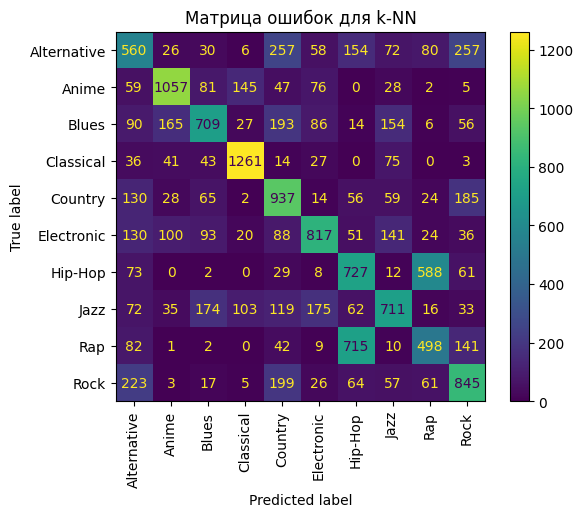

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=label_encoder.classes_)
plt.title(f'Матрица ошибок для k-NN')
plt.xticks(rotation=90)
plt.show()

In [38]:
results['k_NN'] = {
    'best_params': grid_search_knn.best_params_,
    'roc_auc': roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr'),
    'classification_report': classification_report(y_test, y_pred_knn),
    'confusion_matrix': confusion_matrix(y_test, y_pred_knn),
    'training_time': end_time_knn - start_time_knn
}

In [40]:
joblib.dump(grid_search_knn, 'grid_search_knn.pkl')
joblib.dump(results, 'res_knn')

['res_knn']

## Random Forest

In [41]:
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [42]:
param_grid_rf = {
    'feature_selection__k': [5, 10, 15],
    'feature_selection__score_func': [f_classif, mutual_info_classif],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

In [43]:
grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid_rf,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=3
)

In [44]:
start_time_rf = time.time()
grid_search_rf.fit(X_train, y_train)
end_time_rf = time.time()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [45]:
print("Лучшие параметры:", grid_search_rf.best_params_)
print("Лучший ROC AUC на кросс-валидации:", grid_search_rf.best_score_)

Лучшие параметры: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200, 'feature_selection__k': 15, 'feature_selection__score_func': <function mutual_info_classif at 0x0000017719CBBAC0>}
Лучший ROC AUC на кросс-валидации: 0.9308522176870749


In [84]:
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_proba_rf = grid_search_rf.best_estimator_.predict_proba(X_test)

print("ROC AUC на тестовых данных:", roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr'))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

ROC AUC на тестовых данных: 0.9306069851851854
Classification Report:
               precision    recall  f1-score   support

 Alternative       0.49      0.38      0.43      1500
       Anime       0.80      0.75      0.77      1500
       Blues       0.62      0.57      0.59      1500
   Classical       0.84      0.83      0.84      1500
     Country       0.61      0.62      0.62      1500
  Electronic       0.65      0.64      0.64      1500
     Hip-Hop       0.43      0.44      0.43      1500
        Jazz       0.55      0.56      0.56      1500
         Rap       0.42      0.42      0.42      1500
        Rock       0.52      0.69      0.59      1500

    accuracy                           0.59     15000
   macro avg       0.59      0.59      0.59     15000
weighted avg       0.59      0.59      0.59     15000



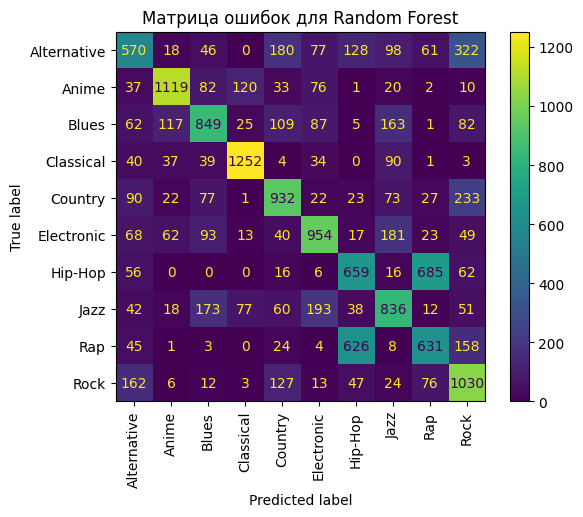

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=label_encoder.classes_)
plt.title(f'Матрица ошибок для Random Forest')
plt.xticks(rotation=90)
plt.show()

In [48]:
results['RF'] = {
    'best_params': grid_search_rf.best_params_,
    'roc_auc': roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr'),
    'classification_report': classification_report(y_test, y_pred_rf),
    'confusion_matrix': confusion_matrix(y_test, y_pred_rf),
    'training_time': end_time_rf - start_time_rf
}

In [49]:
joblib.dump(grid_search_rf, 'grid_search_rf.pkl')
joblib.dump(results, 'res_knn_rf')

['res_knn_rf']

## XGBClassifier

In [50]:
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('classifier', XGBClassifier(random_state=42))
])

In [51]:
param_grid_xgb = {
    'feature_selection__k': [5, 10, 15],
    'feature_selection__score_func': [f_classif, mutual_info_classif],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 6, 10]
}

In [52]:
grid_search_xgb = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid_xgb,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=3
)

In [53]:
start_time_xgb = time.time()
grid_search_xgb.fit(X_train, y_train)
end_time_xgb = time.time()

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [54]:
print("Лучшие параметры:", grid_search_xgb.best_params_)
print("Лучший ROC AUC на кросс-валидации:", grid_search_xgb.best_score_)

Лучшие параметры: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'feature_selection__k': 15, 'feature_selection__score_func': <function f_classif at 0x0000017719CDD480>}
Лучший ROC AUC на кросс-валидации: 0.9514012698412697


In [85]:
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
y_pred_proba_xgb = grid_search_xgb.best_estimator_.predict_proba(X_test)

print("ROC AUC на тестовых данных:", roc_auc_score(y_test, y_pred_proba_xgb, multi_class='ovr'))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

ROC AUC на тестовых данных: 0.9514648987654322
Classification Report:
               precision    recall  f1-score   support

 Alternative       0.59      0.51      0.54      1500
       Anime       0.84      0.79      0.81      1500
       Blues       0.69      0.63      0.66      1500
   Classical       0.88      0.85      0.86      1500
     Country       0.65      0.68      0.67      1500
  Electronic       0.70      0.68      0.69      1500
     Hip-Hop       0.53      0.54      0.54      1500
        Jazz       0.62      0.62      0.62      1500
         Rap       0.52      0.53      0.52      1500
        Rock       0.59      0.74      0.66      1500

    accuracy                           0.66     15000
   macro avg       0.66      0.66      0.66     15000
weighted avg       0.66      0.66      0.66     15000



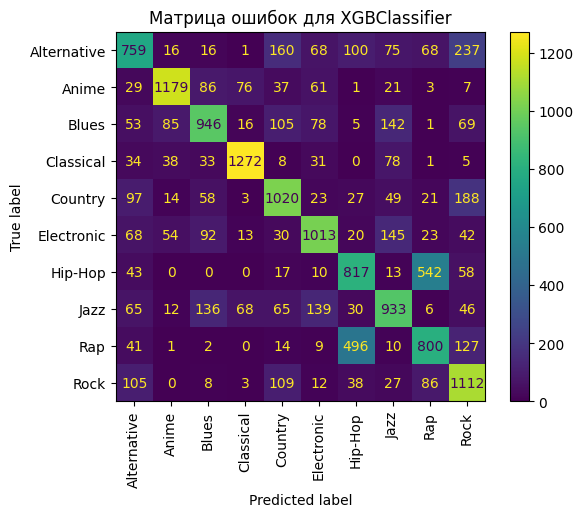

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, display_labels=label_encoder.classes_)
plt.title(f'Матрица ошибок для XGBClassifier')
plt.xticks(rotation=90)
plt.show()

In [57]:
results['XGB'] = {
    'best_params': grid_search_xgb.best_params_,
    'roc_auc': roc_auc_score(y_test, y_pred_proba_xgb, multi_class='ovr'),
    'classification_report': classification_report(y_test, y_pred_xgb),
    'confusion_matrix': confusion_matrix(y_test, y_pred_xgb),
    'training_time': end_time_xgb - start_time_xgb
}

In [58]:
joblib.dump(grid_search_xgb, 'grid_search_xgb.pkl')
joblib.dump(results, 'res_knn_svm_rf_xgb')

['res_knn_svm_rf_xgb']

## SVM

In [59]:
model_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('classifier', SVC(probability=True, random_state=42))
])

In [60]:
param_grid_svm = {
    'feature_selection__k': [5, 10, 15],
    'feature_selection__score_func': [f_classif, mutual_info_classif],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

In [61]:
grid_search_svm = GridSearchCV(
    estimator=model_svm,
    param_grid=param_grid_svm,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=3
)

In [65]:
start_time_svm = time.time()
grid_search_svm.fit(X_train, y_train)
end_time_svm = time.time()

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [66]:
print("Лучшие параметры:", grid_search_svm.best_params_)
print("Лучший ROC AUC на кросс-валидации:", grid_search_svm.best_score_)

Лучшие параметры: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf', 'feature_selection__k': 10, 'feature_selection__score_func': <function f_classif at 0x0000017719CDD480>}
Лучший ROC AUC на кросс-валидации: 0.9249072199546486


In [86]:
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)
y_pred_proba_svm = grid_search_svm.best_estimator_.predict_proba(X_test)

print("ROC AUC на тестовых данных:", roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr'))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

ROC AUC на тестовых данных: 0.926194839506173
Classification Report:
               precision    recall  f1-score   support

 Alternative       0.45      0.38      0.41      1500
       Anime       0.76      0.74      0.75      1500
       Blues       0.60      0.54      0.57      1500
   Classical       0.85      0.83      0.84      1500
     Country       0.56      0.57      0.56      1500
  Electronic       0.66      0.60      0.63      1500
     Hip-Hop       0.44      0.49      0.47      1500
        Jazz       0.55      0.52      0.53      1500
         Rap       0.44      0.41      0.42      1500
        Rock       0.53      0.74      0.62      1500

    accuracy                           0.58     15000
   macro avg       0.58      0.58      0.58     15000
weighted avg       0.58      0.58      0.58     15000



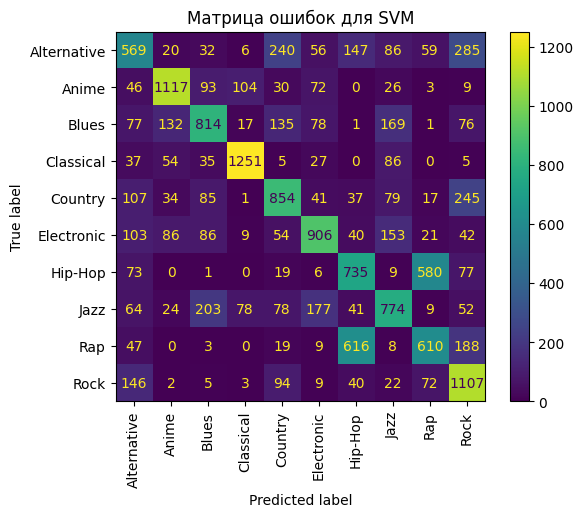

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=label_encoder.classes_)
plt.title(f'Матрица ошибок для SVM')
plt.xticks(rotation=90)
plt.show()

In [69]:
results['SVM'] = {
    'best_params': grid_search_svm.best_params_,
    'roc_auc': roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr'),
    'classification_report': classification_report(y_test, y_pred_svm),
    'confusion_matrix': confusion_matrix(y_test, y_pred_svm),
    'training_time': end_time_svm - start_time_svm
}

In [70]:
joblib.dump(grid_search_svm, 'grid_search_svm.pkl')
joblib.dump(results, 'res_knn_svm')

['res_knn_svm']

In [71]:
results

{'k_NN': {'best_params': {'classifier__n_neighbors': 15,
   'classifier__p': 1,
   'classifier__weights': 'uniform',
   'feature_selection__k': 10,
   'feature_selection__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>},
  'roc_auc': 0.8979412543209877,
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.38      0.37      0.38      1500\n           1       0.73      0.70      0.72      1500\n           2       0.58      0.47      0.52      1500\n           3       0.80      0.84      0.82      1500\n           4       0.49      0.62      0.55      1500\n           5       0.63      0.54      0.58      1500\n           6       0.39      0.48      0.43      1500\n           7       0.54      0.47      0.50      1500\n           8       0.38      0.33      0.36      1500\n           9       0.52      0.56      0.54      1500\n\n    accuracy                           0.54     15000\n   macro avg  

## Оценка важности признаков

In [111]:
weights = grid_search_xgb.best_estimator_.named_steps['classifier'].feature_importances_
features = grid_search_xgb.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
feature_importance = pd.Series({k: v for k, v in zip(features, weights)})
feature_importance = pd.DataFrame(feature_importance.sort_values(key=lambda x: abs(x), ascending=False)).reset_index()
feature_importance.columns = ['feature', 'importance']

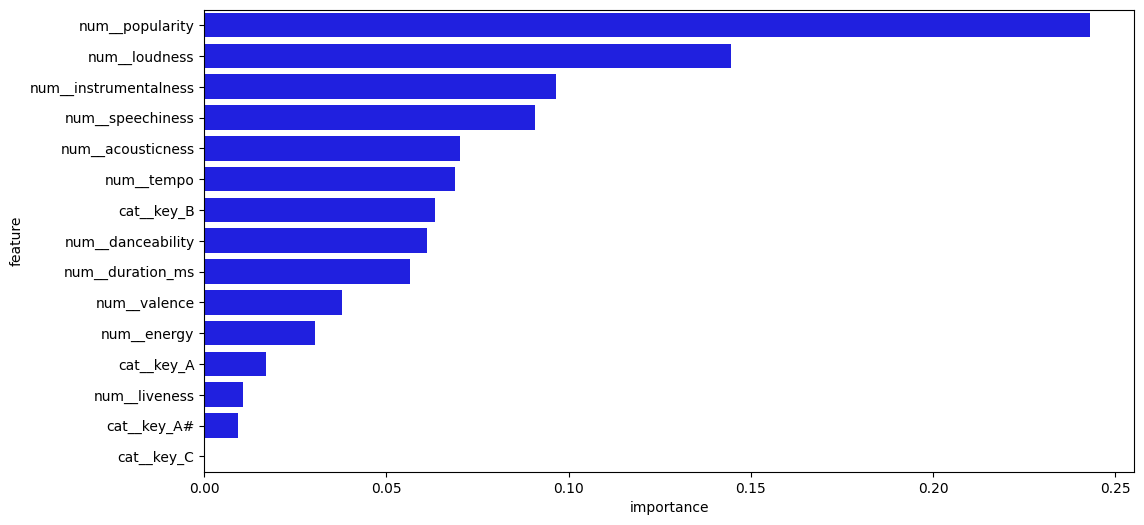

In [118]:
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, orient='h', color='b');